# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
using Plots
using DualNumbers
pyplot()
include("workbook3_functions.jl");

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

$\textbf{Question 1.1}$:

Let $f_i = f(x_i)$, then by taylor expansion
- $f_{i+1} = f_i + hf_i' +\frac{1}{2} h^2 f_i'' + \mathcal{O}(h^3)$
- $f_i = f_i $
- $f_{i+2} = f_i +2hf_i' + 2h^2 f_i'' + \mathcal{O}(h^3)$

Then consider the linear combination of the 3-point stencil where $a_i \in \mathbb{R}, i=1,2,3$ such that, $$a_1 f_{i+2} + a_2 f_{i} + a_3 f_{i+1}= (a_1+a_2+a_3)f_i + h(a_1+2a_3)f_i' +h^2 (\frac{1}{2} a_1 + 2 a_3)f_i'' + \mathcal{O}(h^3)$$ with,

$$a_1+a_2+a_3 = 0,$$ $$a_1+2a_3=1,$$ $$\frac{1}{2} a_1 + 2 a_3 = 0$$ 

Following this we get the finite difference formula with $a_1 = 2, a_2 = \frac{-3}{2} \ \text{and} \ a_3 = \frac{-1}{2}$:

$$\frac{d f(x_i)}{d x} = \frac{4 f(x_i +h) -3 f(x_i) - f(x_i +2h)}{2h} + \mathcal{O}(h^2) $$

$\textbf{Question 1.2}$:

By the chain rule, $f'(x) = \cos(e^x) e^x$

In [2]:
error = zeros(30) #make a vector to find the relative error of the finite difference for different h's
H = zeros(30)
for i = 1:30
    H[i] = 2^(-float(i)) #for h between 2^{-30} and 2^{-1}
    X =1
    approx = finitediff(H[i], 1, sinexp) #uses finitediff function from workbook2_functions
    error[i] = abs((approx - sinexp(1)[2]))/abs((sinexp(1)[2]))
end

println("The exact derivative evaluated at 1 = ", sinexp(1)[2]) #derivative evaluated at 1

The exact derivative evaluated at 1 = -2.478349732955235



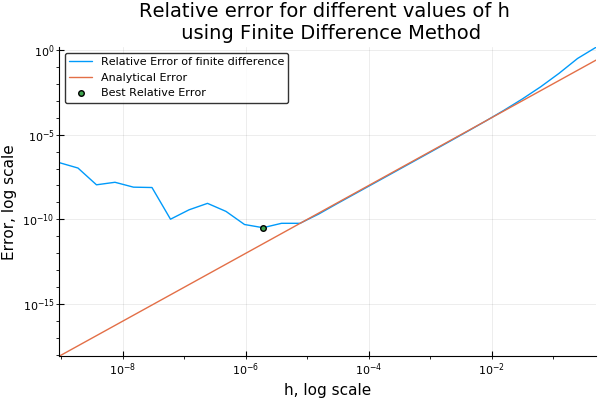

In [3]:
plot(H, error, 
    xlabel = "h, log scale", 
    ylabel = "Error, log scale", 
    label = "Relative Error of finite difference", 
    xaxis = :log, 
    yaxis = :log,
    title = "Relative error for different values of h \n using Finite Difference Method"
)

plot!(H, H.^2, 
    label = "Analytical Error"
)

scatter!([H[19]], [error[19]], 
    label = "Best Relative Error"
)

The best relative error we can achieve is given by the minimum of the log-log function of the error plotted agaisnt h. 

In [4]:
find(log(error).==minimum(log(error)))
println("The smallest relative error is =", error[19])

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] log(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/colmconnaughton/.julia/v0.6/Compat/src/Compat.jl:174
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/colmconnaughton/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/colmconnaughton/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 1


The smallest relative error is =3.2358031082852225e-11


<font color=blue>
I got some deprecation warnings from log(error) when I ran this. To apply a function f to every element of an array X, use f.(X) rather than f(X). The former works for now but will be removed in a future release of Julia.
</font>

Dual numbers satisify $f(x+\varepsilon) = f(x) + f'(x) \varepsilon $ then the real part of a dual number is $f(x)$ and the dual part is $f'(x)$.

In [5]:
xx = Dual(1,1)
derivative = dualpart(sinexp(xx)[1])
relerror = derivative - sinexp(1)[2] #error is zero so the derivative calculated 
#from dual numbers is accurate to machine precision

0.0

<font color=blue>
Good answer - looks all correct.
</font>

<font color=blue>
15/15
</font>

## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

$\textbf{Question 2.1}$: 

We find the roots of the equation, that is $ f(x) = \sin(e^x) = 0 \Leftrightarrow x = \log(n \pi)$. Then as we consider the domain $0<x<2$ the valid roots of $f$ over this interval are $x = \log(\pi)$ and $x = \log( 2\pi)$.

In [ ]:
x = linspace(0,2,100)
y = sin(exp(x))
plot(x,y, 
    title = "Plot of f(x)", 
    label = "f(x) = sin(exp(x))", 
    xlabel = "x", 
    ylabel = "f(x)"
)

In [ ]:
K = bandb(0.5,1.5, sinexp, log(pi)); #input bracket interval [0.5, 1.5] and
#the exact value of the root we are interested in to calculate the error 
println("The root on the interval [0.5, 1.5] is x = ", K[1])

In [ ]:
println("final precision is " ,(K[1]- log(pi))/log(pi))

plot(1:length(K[3]), K[3],
    xlabel = "Number of Iterations",
    ylabel = "Error, log scale",
    yaxis = :log,
    label = "Bracket and Bisect",
    title = "Error at each step of Bracket and Bisect Method"
)

In [ ]:
N = newtonraps(sinexp, 0.8,log(pi)) # input a value, close to where you believe there is a fp 
iterations = 1:(length(N[3])-1) 
I2 = linspace(1,6, 100);

In [ ]:
plot(iterations, N[3][iterations],
    label ="Newton Rhapson",
    yaxis = :log,
    ylabel = "log error", 
    xlabel = "Number of iterations",
    title = "Comparing the two methods on the speed of \n the error to decrease with the number of iterations"
)
plot!(1:length(N[3]), K[3][1:length(N[3])],
    yaxis = :log,
    label = "Bracket and Bisket"
)
plot!(I2, exp(-I2),
    label = "exponential function",
    yaxis = :log
)

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f''(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f''(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.

$\textbf{Question 3.1}$:

Consider $f(x) = \sin(exp(x))$, then minimum $x^*$ occurs when: $$f'(x^*) = 0 \Leftrightarrow \cos(exp(x^*)) = 0 $$ Then the general solution to this equation is $x^* = \log(\frac{2n+1}{2} \pi)$. On the domain $0<x<2$ this returns $x^* = \log(\frac{\pi}{2})$ as the maximum of $f(x)$ and $x^* = \log(\frac{3 \pi}{2})$ as the minimum.

$\textbf{Question 3.3}$:

By the taylor expansion $$f(x) = f(x^*) + f'(x^*) (x-x^*) + \frac{f''(x^*)}{2}(x-x^*)^2 + \mathcal{O}((x-x^*)^3)$$ Then as $f'(x^*) = 0$ by the construction of $x^*$ being the minimum of $f(x)$. Then $$f(x) \approx f(x^*) \left( 1 + \frac{f''(x^*)}{2 f(x*)} (x-x^*)^2 \right)$$

If we consider $\frac{\left| f(x) - f(x^*) \right|}{\left| f(x^*) \right|} >\varepsilon_m$ where $\varepsilon_m$ is the machine precision, that is the smallest value that can be added to 1 that returns a different value.

Then, $$\frac{\left| f(x) - f(x^*) \right|}{\left| f(x^*) \right|} = \frac{\left| f(x^*) \left( \frac{f''(x^*)}{2 f(x^*)}(x-x^*)^2 \right) \right|}{\left| f(x^*) \right|} = \frac{\left| f''(x^*) \right| (x-x^*)^2}{2 \left| f(x^*) \right|} > \varepsilon_m \Leftrightarrow \left| x-x^* \right|  > \sqrt{\frac{2 \varepsilon_m \left| f(x^*) \right| }{\left| f''(x^*) \right| }} = \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x^*)}{f''(x^*)}\right|}$$

The second derivative is equal to $f''(x) = -(e^x)^2 \sin(e^x) + \cos(e^x) e^x$, which will be used below.

In [ ]:
G = golden(1, 2, sinexp, log(3*pi/2)) #input range the minimum occurs [1,2] and the exact value
time3 = 1:length(G[2]);
println("Minimum occurs at x = ", G[1][1])

In [ ]:
plot(time3, G[2],
    yaxis = :log,
    xlabel = "Number of Iterations",
    ylabel = "Error log scale",
    label = "Golden search",
    title = "Golden Section Search, \n how error decreases with the number of iterations"
)

In [ ]:
println("The difference between the exact value and the Golden Section Search Approx = " ,(log(3*pi/2) - G[1][1]))

secondderiv(x) = -exp(2*x)*cos(exp(x)) + exp(x)*sin(exp(x))

println("From the analysis above, |x-x*|> ", sqrt(2*sinexp(1)[1]/secondderiv(1))*sqrt(eps()))